# Churned Customer Study Notebook

## Objectives

*   Answer business requirement 1: 
    * The client is interested to understand the patterns from the customer base, so the client can learn the most relevant variables that are correlated to a churned customer.

## Inputs

* outputs/datasets/collection/Ames_Iowa_House.csv

## Outputs

* generate code that answers business requirement 1 and can be used to build the Streamlit App






---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/Heritage-Housing-Issues'

---

# Load Data

In [4]:
import pandas as pd
df = (pd.read_csv("outputs/datasets/collection/Ames_Iowa_House.csv")
    )
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


# Data Exploration

We are interested to get more familiar with the dataset, check variable type and distribution, missing levels and what these variables mean in a business context

In [5]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Correlation Study

In [6]:
df = df.drop(columns=['2ndFlrSF', 'BedroomAbvGr', 'BsmtFinType1', 'EnclosedPorch', 'GarageFinish', 'GarageYrBlt', 'LotFrontage', 'WoodDeckSF', 'BsmtFinSF1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea', 'MasVnrArea', 'OpenPorchSF', 'TotalBsmtSF', 'WoodDeckSF'])

In [7]:
df = df.dropna()

df.index

RangeIndex(start=0, stop=1460, step=1)

In [8]:
from feature_engine.encoding import OneHotEncoder
encoder = OneHotEncoder(variables=df.columns[df.dtypes=='object'].to_list(), drop_last=False)
df_ohe = encoder.fit_transform(df)
print(df_ohe.shape)
df_ohe.head(5)

(1460, 17)


,1stFlrSF,GrLivArea,LotArea,OverallCond,OverallQual,YearBuilt,YearRemodAdd,SalePrice,BsmtExposure_No,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_Av,BsmtExposure_None,KitchenQual_Gd,KitchenQual_TA,KitchenQual_Ex,KitchenQual_Fa
0,856,1710,8450,5,7,2003,2003,208500,1,0,0,0,0,1,0,0,0
1,1262,1262,9600,8,6,1976,1976,181500,0,1,0,0,0,0,1,0,0
2,920,1786,11250,5,7,2001,2002,223500,0,0,1,0,0,1,0,0,0
3,961,1717,9550,5,7,1915,1970,140000,1,0,0,0,0,1,0,0,0
4,1145,2198,14260,5,8,2000,2000,250000,0,0,0,1,0,1,0,0,0


We use `.corr()` for `spearman` and `pearson` methods, and investigate the top 10 correlations
* We know this command returns a pandas series and the first item is the correlation between Churn and Churn, which happens to be 1, so we exclude that with `[1:]`
* We sort values considering the absolute value, by setting `key=abs`

In [9]:
corr_spearman = df_ohe.corr(method='spearman')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(10)
corr_spearman

OverallQual        0.809829
GrLivArea          0.731310
YearBuilt          0.652682
KitchenQual_TA    -0.581803
1stFlrSF           0.575408
YearRemodAdd       0.571159
KitchenQual_Gd     0.478583
LotArea            0.456461
KitchenQual_Ex     0.346387
BsmtExposure_Gd    0.243258
Name: SalePrice, dtype: float64

We do the same for `pearson`

In [10]:
corr_pearson = df_ohe.corr(method='pearson')['SalePrice'].sort_values(key=abs, ascending=False)[1:].head(44)
corr_pearson

OverallQual          0.790982
GrLivArea            0.708624
1stFlrSF             0.605852
YearBuilt            0.522897
KitchenQual_TA      -0.519298
YearRemodAdd         0.507101
KitchenQual_Ex       0.504094
KitchenQual_Gd       0.321641
BsmtExposure_Gd      0.307298
LotArea              0.263843
BsmtExposure_No     -0.263600
KitchenQual_Fa      -0.157199
BsmtExposure_None   -0.150231
BsmtExposure_Av      0.136793
OverallCond         -0.077856
BsmtExposure_Mn      0.043493
Name: SalePrice, dtype: float64

As expected, we now observe a moderate to strong positive correlation between the sale price of a house and its quality, size, and the year it was built.

To more accurately compare the house's size with the sale price, we will later combine all the variables related to the size of the house. Additionally, we will reintroduce the variables that were previously excluded, assuming that missing data indicates, for instance, that the house does not have a basement. This approach will allow us to calculate the total square footage, providing a more precise comparison with the sale price to better reflect their correlation.

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

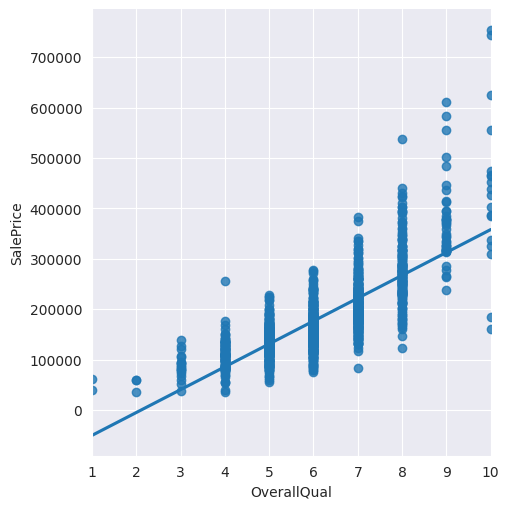

In [12]:
%matplotlib inline
sns.set_style("darkgrid")
sns.lmplot(data=df, x="OverallQual", y="SalePrice", ci=None)
plt.show()

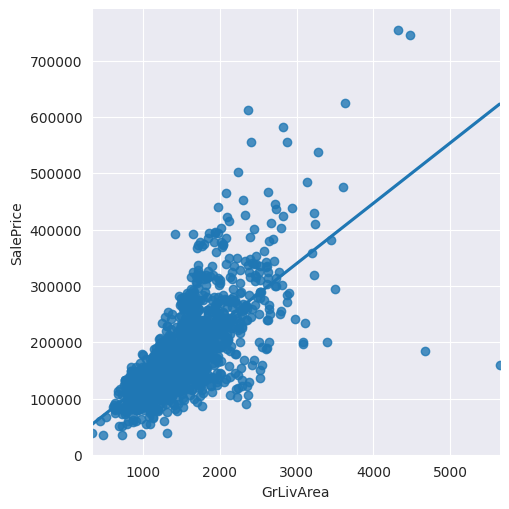

In [13]:
sns.lmplot(data=df, x="GrLivArea", y="SalePrice", ci=None)
plt.show()

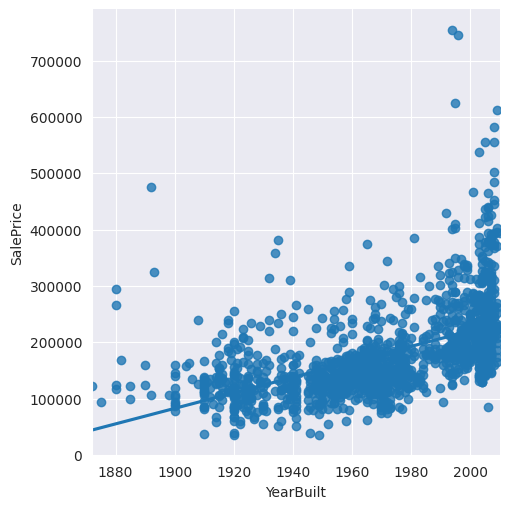

In [14]:
sns.lmplot(data=df, x="YearBuilt", y="SalePrice", ci=None)
plt.show()

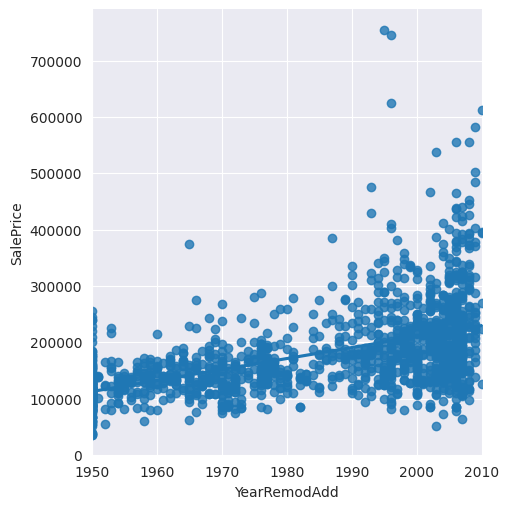

In [15]:
sns.lmplot(data=df, x="YearRemodAdd", y="SalePrice", ci=None)
plt.show()

The data above shows a positive correlation between all the variables compared to the key variable, sale price.

However, there are several outliers that will need to be addressed later when we prepare the data for our machine learning pipeline.

Additionally, interesting trends emerge when we visualize the data after separating the houses based on their overall quality scores.

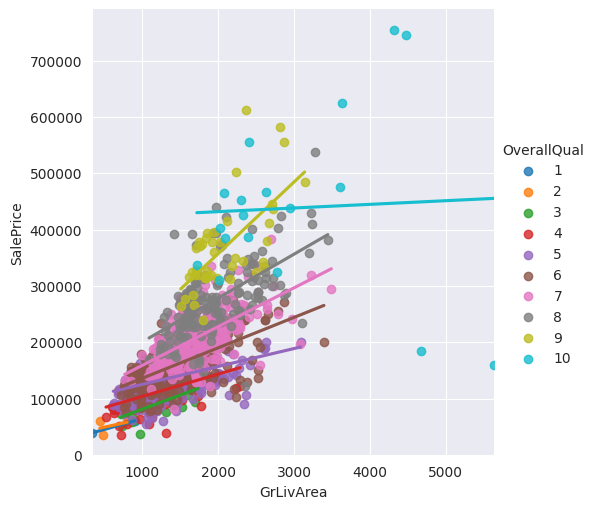

In [16]:
sns.lmplot(data=df, x="GrLivArea", y="SalePrice", ci=None, hue='OverallQual')
plt.show()

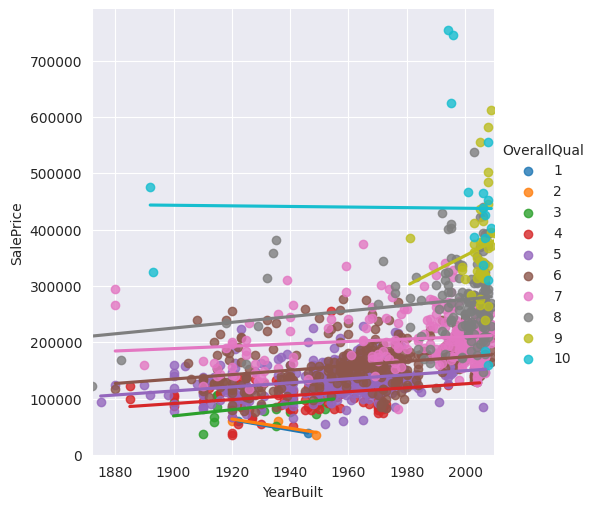

In [17]:
sns.lmplot(data=df, x="YearBuilt", y="SalePrice", ci=None, hue='OverallQual' )
plt.show()

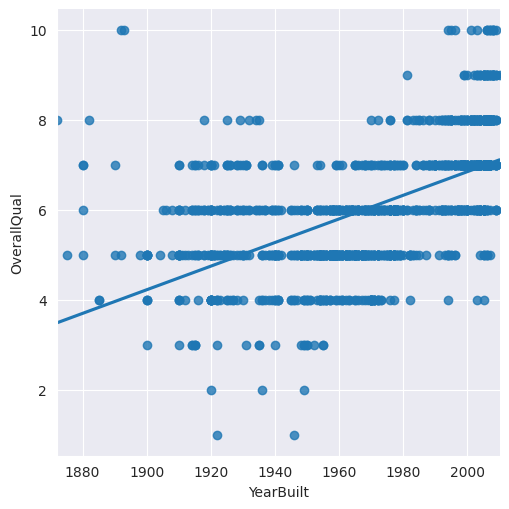

In [18]:
sns.lmplot(data=df, x="YearBuilt", y="OverallQual", ci=None)
plt.show()

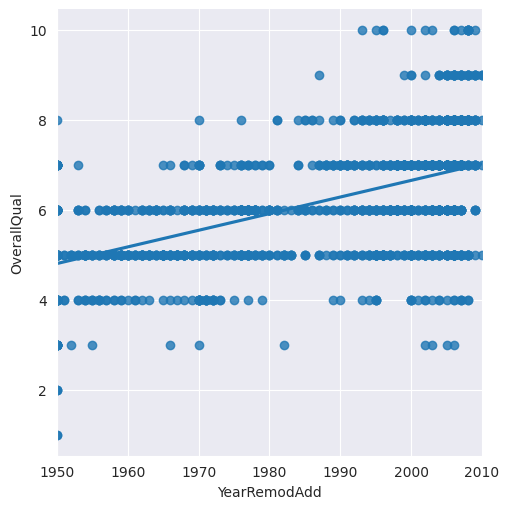

In [19]:
sns.lmplot(data=df, x="YearRemodAdd", y="OverallQual", ci=None)
plt.show()

In [20]:
sns.lmplot(data=df, x="GarageArea", y="GrLivArea", ci=None)
plt.show()

KeyError: "['GarageArea'] not in index"

---

# Conclusions and Next steps


The correlations and plots confirm several findings that address our first business question:

"The client wants to understand how various house attributes correlate with the typical house sale price."

- Larger houses generally have higher sale prices.
- Houses with higher overall quality tend to have higher sale prices.
- Newer houses sometimes command higher sale prices, though this is primarily because newer houses are often of higher quality.
- We also hypothesized that recently remodeled houses would have higher sale prices. While this shows a weak correlation with sale price, it has a slightly stronger correlation with overall quality, which is a better predictor of sale price.